In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = [7.48, 4.2]
plt.rcParams['figure.dpi'] = 500
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

BLUE = "#152B52"
RED = "#E54B4B"

ANNOTS = dict(color="black", fontsize=8)

In [3]:
df = pd.read_excel("SaezZucman2020JEPData.xlsx", sheet_name="DataF4(Growth)", skiprows=3)
df = df.iloc[:132,0:6]
df.columns = ['IncomePercentile', 'Avg_1946-1980', 'Avg_1980-2018', 'Growth_1946-1980', 'Growth_1980-2018', 'PeoplesGrowth_1980-2018']
df

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,IncomePercentile,Avg_1946-1980,Avg_1980-2018,Growth_1946-1980,Growth_1980-2018,PeoplesGrowth_1980-2018
0,0.000,0.019824,0.014078,NaN,NaN,0.0065
1,1.000,0.019824,0.014078,NaN,NaN,0.0065
2,2.000,0.019824,0.014078,NaN,NaN,0.0065
3,3.000,0.019824,0.014078,NaN,NaN,0.0065
4,4.000,0.019824,0.014078,NaN,NaN,0.0065
...,...,...,...,...,...,...
127,99.997,0.019824,0.014078,0.010191,0.043011,0.0065
128,99.998,0.019824,0.014078,0.010191,0.043701,0.0065
129,99.999,0.019824,0.014078,0.010191,0.058686,0.0065
130,99.999,NaN,NaN,NaN,NaN,NaN


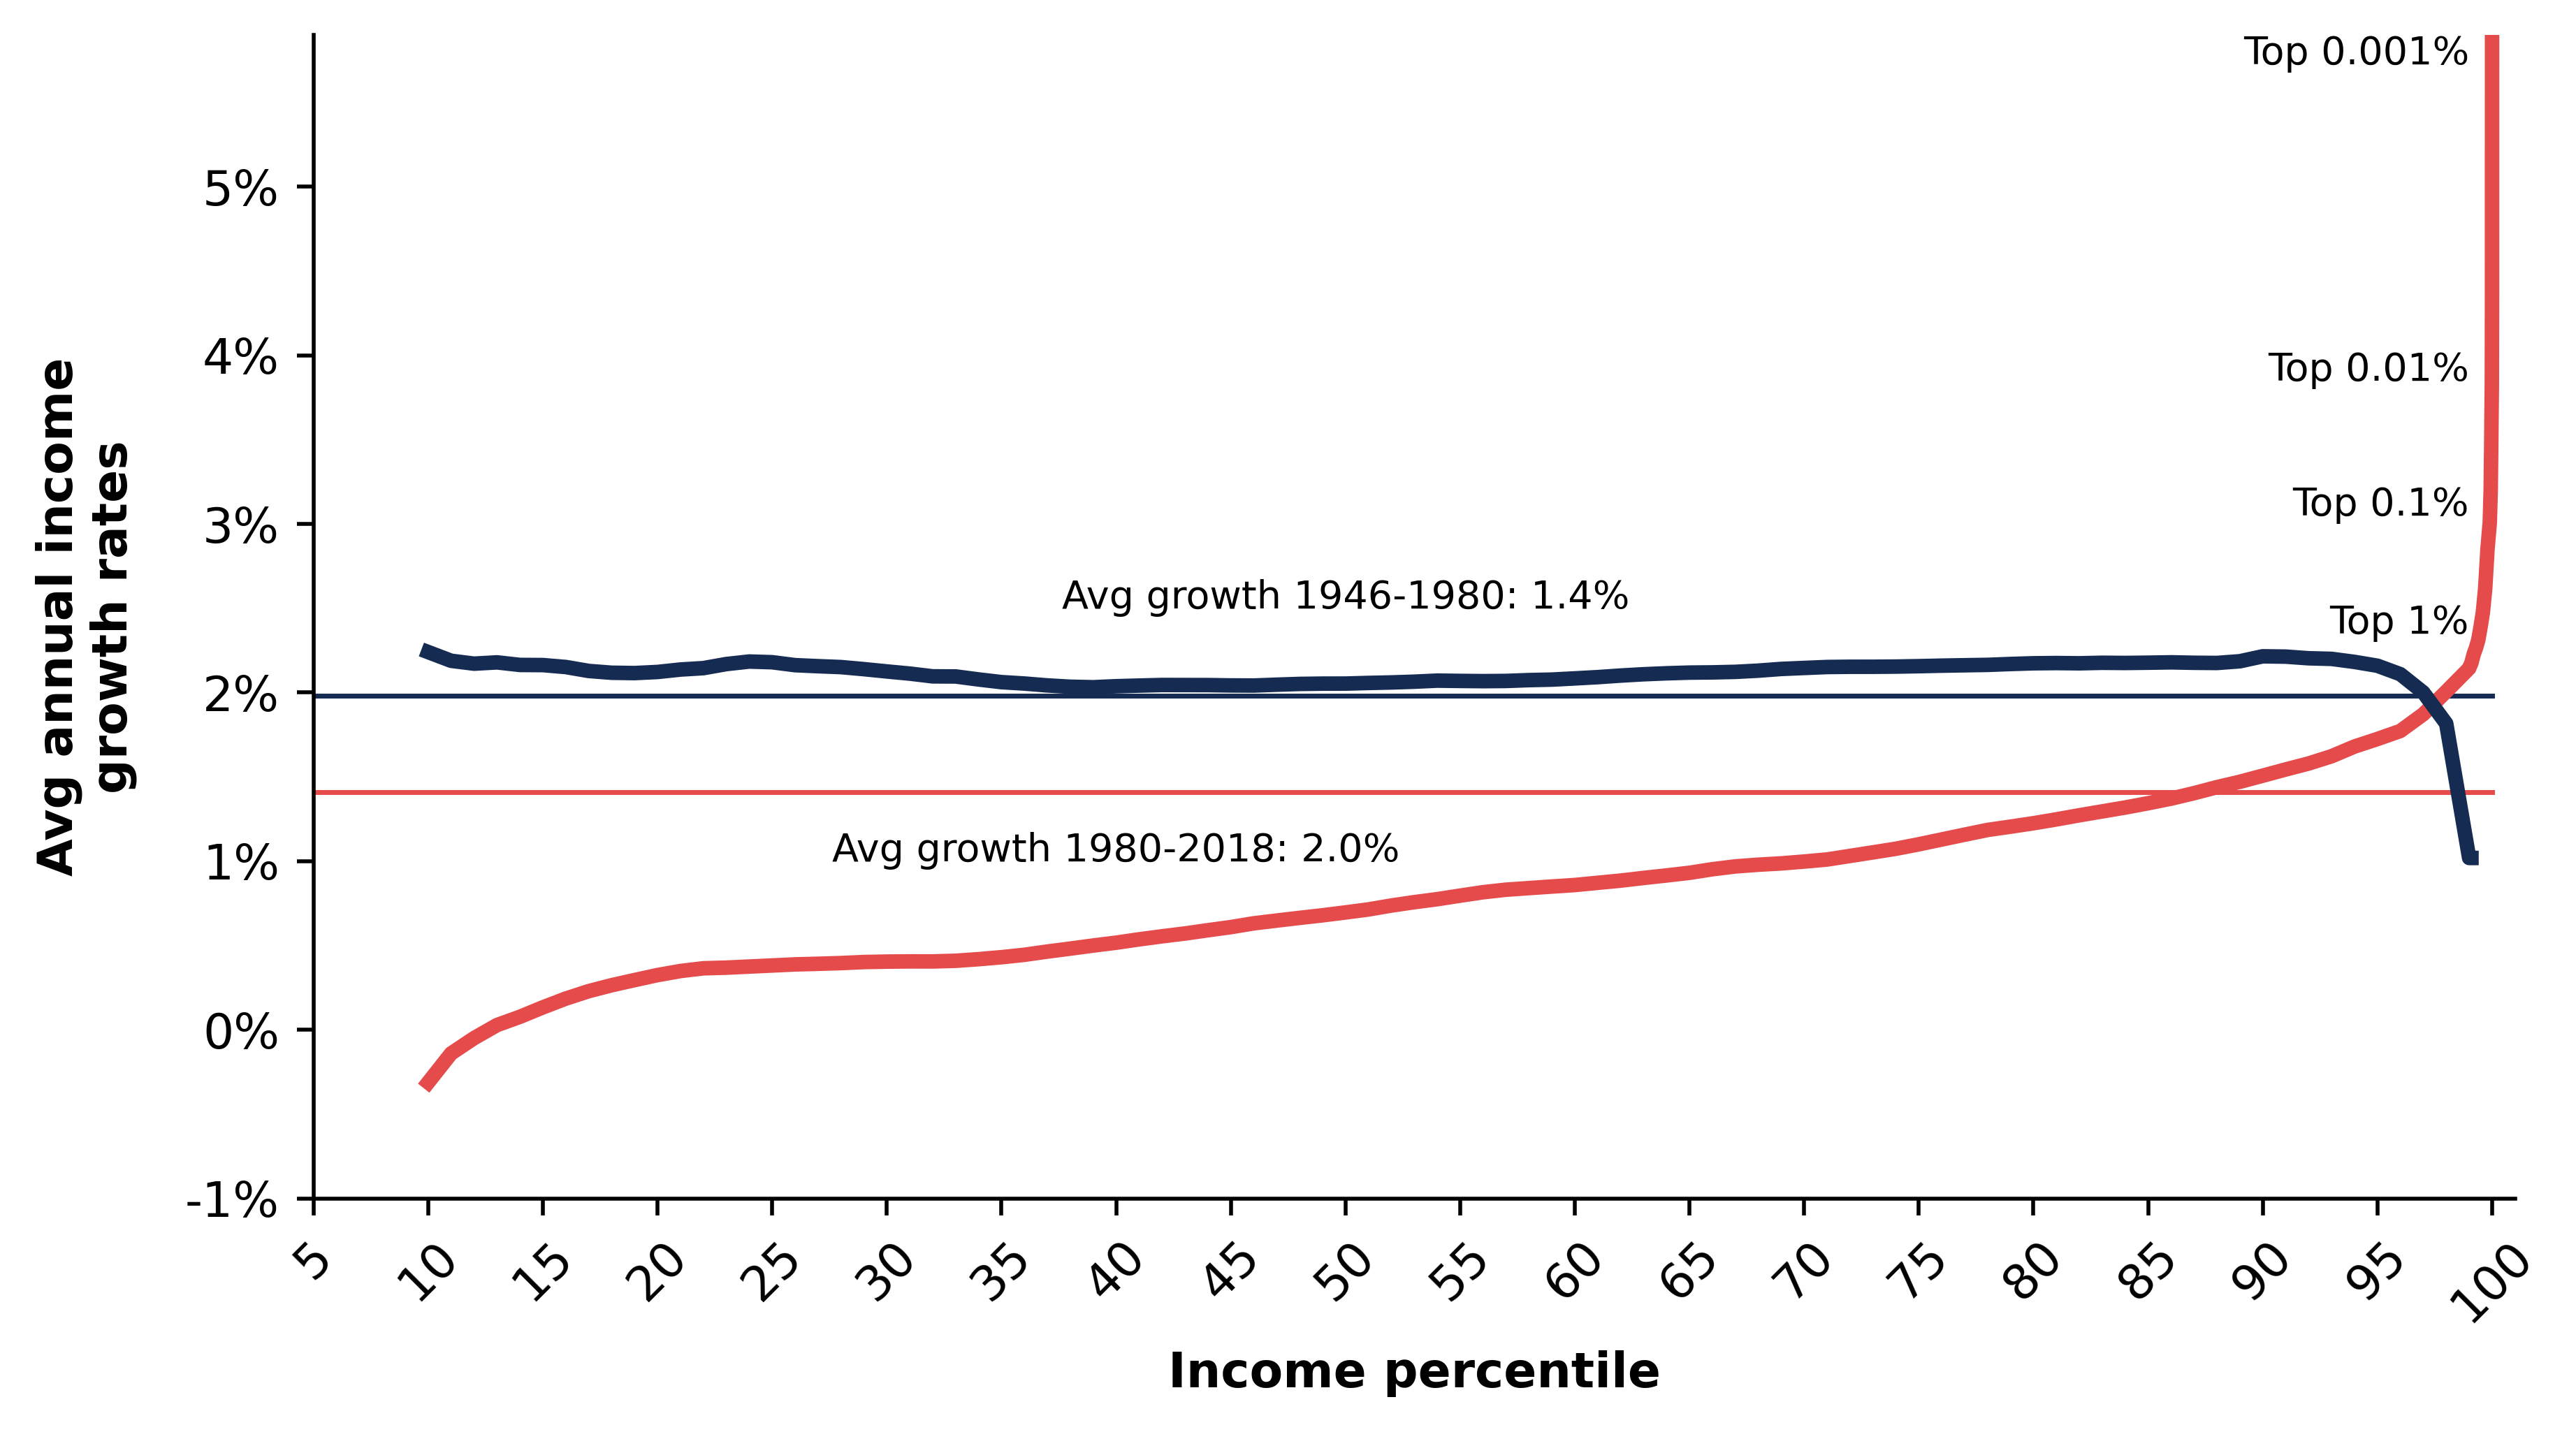

In [4]:
xs = np.array(df['IncomePercentile'])

# average growth
plt.plot(xs, np.array(df['Avg_1946-1980']), lw=1, color=BLUE)
plt.plot(xs, np.array(df['Avg_1980-2018']), lw=1, color=RED)

# growth by percentiles
plt.plot(xs, np.array(df['Growth_1980-2018']), lw=3, color=RED)
plt.plot(xs[0:-30], np.array(df['Growth_1946-1980'])[0:-30], lw=3, color=BLUE)

plt.xlim(5,101)
plt.xticks(np.arange(5,105,5), rotation=45)
plt.xlabel("Income percentile", weight='bold')

plt.ylim(-.01,.059)
plt.yticks([-.01, 0, .01, .02, .03, .04, .05], labels=["-1%", "0%", "1%", "2%", "3%", "4%", "5%"])
plt.ylabel("Avg annual income\ngrowth rates", rotation=90, labelpad=10, weight='bold')

# annotations
plt.text(40, .01, "Avg growth 1980-2018: 2.0%", ha='center', **ANNOTS)
plt.text(50, .025, "Avg growth 1946-1980: 1.4%", ha='center', **ANNOTS)
plt.text(99, .059, "Top 0.001%", ha='right', va='top', **ANNOTS)
plt.text(99, .038, "Top 0.01%", ha='right', va='bottom', **ANNOTS)
plt.text(99, .03, "Top 0.1%", ha='right', va='bottom', **ANNOTS)
plt.text(99, .021+.002, "Top 1%", ha='right', va='bottom', **ANNOTS)

plt.tight_layout()
plt.savefig("income.png")

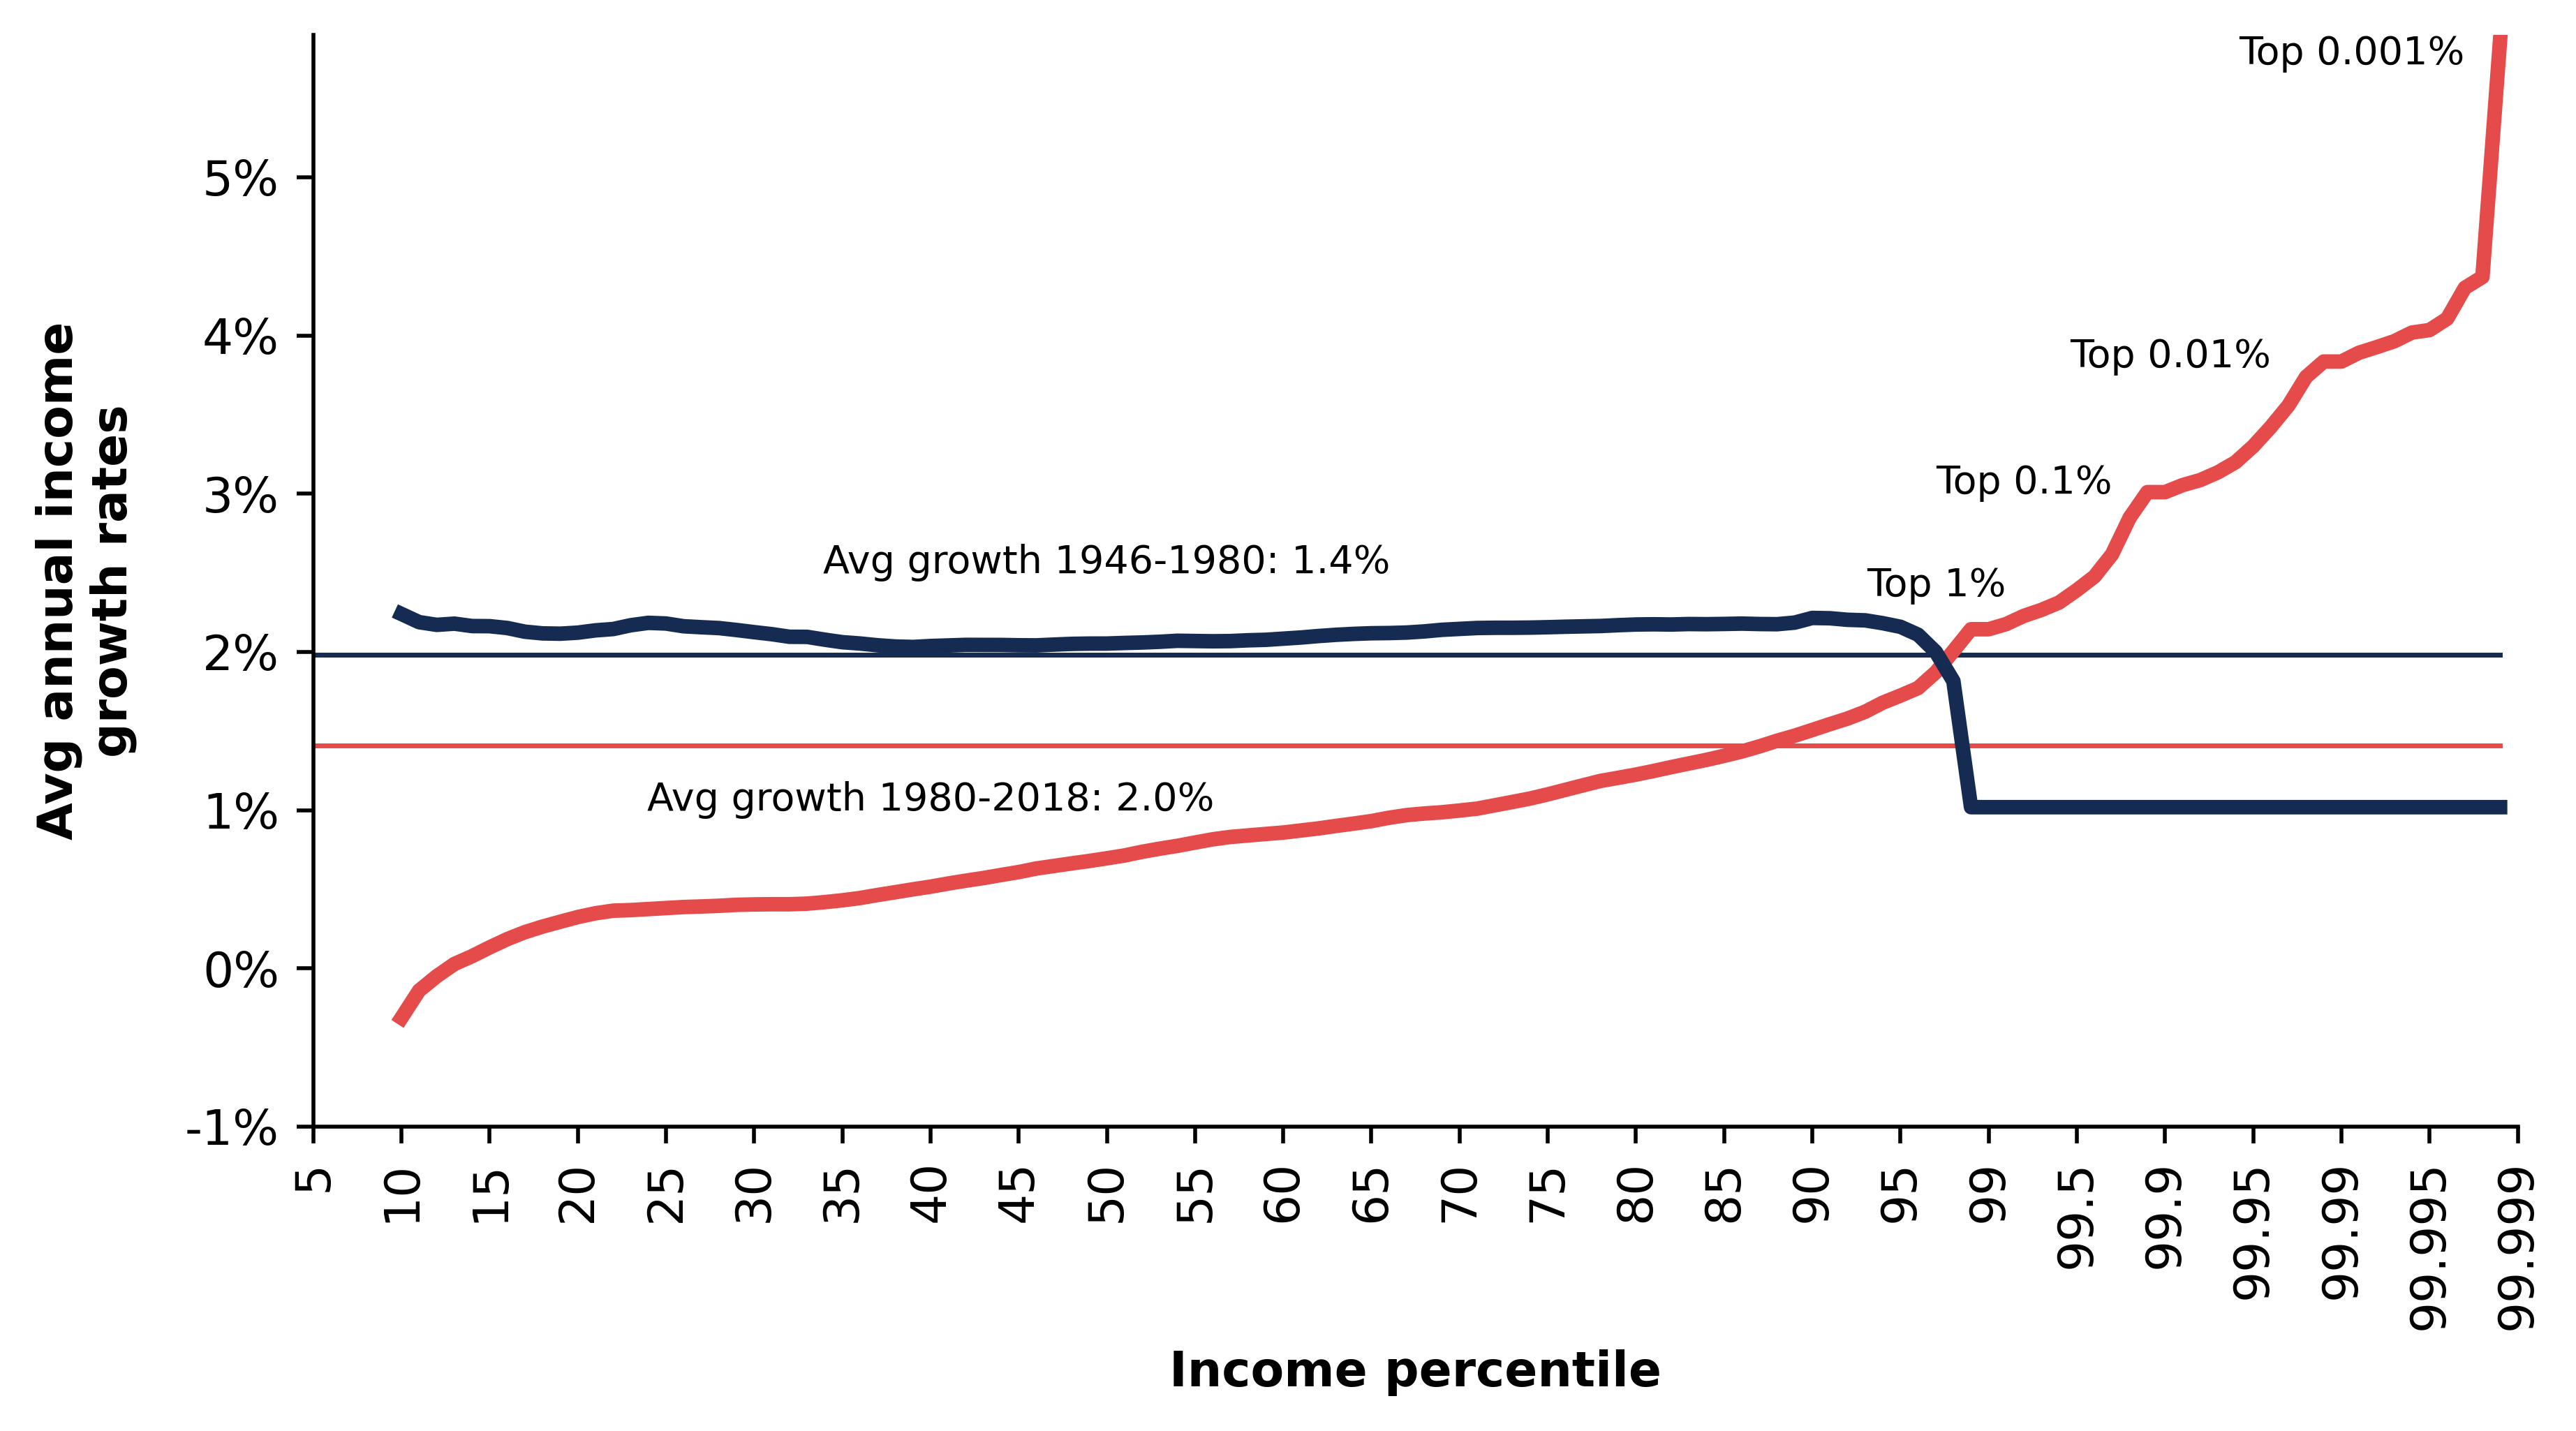

In [5]:
# variation

xaxis = np.arange(len(df))
percentiles = np.array(df['IncomePercentile'])
labels = [int(p) if p == int(p) else p for p in percentiles]

# average growth
plt.plot(xaxis, np.array(df['Avg_1946-1980']), lw=1, color=BLUE)
plt.plot(xaxis, np.array(df['Avg_1980-2018']), lw=1, color=RED)

# growth by percentiles
plt.plot(xaxis, np.array(df['Growth_1980-2018']), lw=3, color=RED)
plt.plot(xaxis, np.array(df['Growth_1946-1980']), lw=3, color=BLUE)

plt.xlim(5,100)
plt.xticks(xaxis[5::5], labels=labels[5::5], rotation=90)
plt.xlabel("Income percentile", weight='bold')

plt.ylim(-.01,.059)
plt.yticks([-.01, 0, .01, .02, .03, .04, .05], labels=["-1%", "0%", "1%", "2%", "3%", "4%", "5%"])
plt.ylabel("Avg annual income\ngrowth rates", rotation=90, labelpad=10, weight='bold')

# annotations
plt.text(40, .01, "Avg growth 1980-2018: 2.0%", ha='center', **ANNOTS)
plt.text(50, .025, "Avg growth 1946-1980: 1.4%", ha='center', **ANNOTS)
plt.text(127, .059, "Top 0.001%", ha='right', va='top', **ANNOTS)
plt.text(116, .038, "Top 0.01%", ha='right', **ANNOTS)
plt.text(107, .03, "Top 0.1%", ha='right', **ANNOTS)
plt.text(101, .021+.002, "Top 1%", ha='right', va='bottom', **ANNOTS)

plt.tight_layout()
#plt.savefig("income.png")